# Executive Visualization Demo: Premium Multiplier & Breakeven Analysis

This notebook demonstrates the new executive visualizations for insurance program optimization:
- **Figure 9**: Premium Multiplier Analysis
- **Figure 10**: Breakeven Timeline Analysis

These visualizations help executives understand why optimal premiums significantly exceed expected losses (2-5×) and when insurance investments pay back through compound benefits.

In [1]:
# Setup imports
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import warnings

# Add parent directory to path if needed (for running from notebooks directory)
try:
    from ergodic_insurance.visualization.executive_plots import (
        plot_premium_multiplier,
        plot_breakeven_timeline
    )
except ImportError:
    # If that fails, try adding parent paths
    notebook_dir = Path().absolute()
    parent_dir = notebook_dir.parent.parent  # Go up two levels to project root
    sys.path.insert(0, str(parent_dir))
    
    # Try alternative import paths
    try:
        from ergodic_insurance.visualization.executive_plots import (
            plot_premium_multiplier,
            plot_breakeven_timeline
        )
    except ImportError:
        # Last resort - direct import
        sys.path.insert(0, str(notebook_dir.parent))
        from src.visualization.executive_plots import (
            plot_premium_multiplier,
            plot_breakeven_timeline
        )

warnings.filterwarnings('ignore')

# Set up plotting defaults
%matplotlib inline
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.facecolor'] = 'white'

print("✅ Executive visualization functions loaded successfully!")
print("\nAvailable functions:")
print("  - plot_premium_multiplier(): Premium as multiple of expected loss")
print("  - plot_breakeven_timeline(): When benefits exceed costs")

✅ Executive visualization functions loaded successfully!

Available functions:
  - plot_premium_multiplier(): Premium as multiple of expected loss
  - plot_breakeven_timeline(): When benefits exceed costs


## Figure 9: Premium Multiplier Analysis

This visualization shows why optimal premiums are 2-5× expected losses from an ergodic perspective.
Key insights:
- Smaller companies need higher multiples for safety
- Larger companies can accept lower multiples due to diversification
- The optimal zone is typically 2-5× expected losses

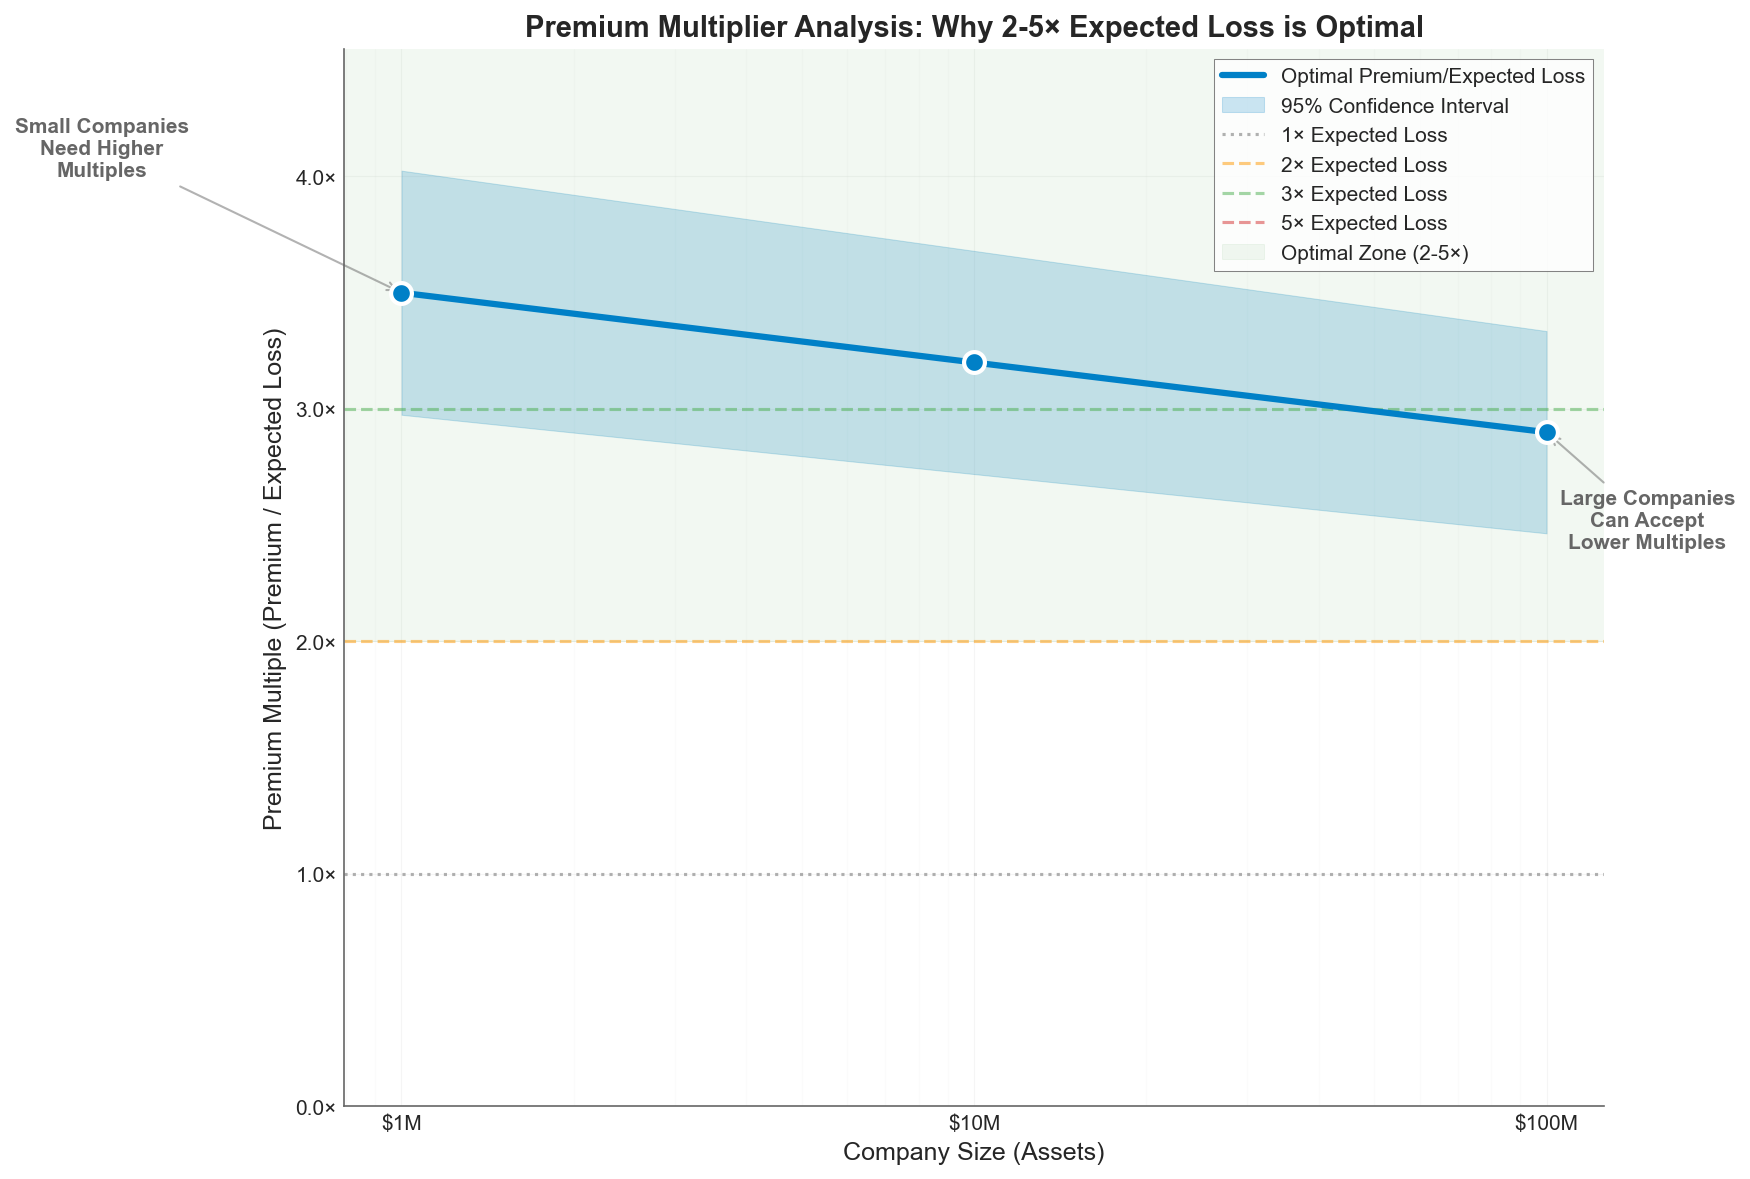


💡 Key Insights:
  • Optimal premiums are 2-5× expected losses (not 1.1-1.3× as traditional models suggest)
  • Smaller companies ($1M) need higher multiples (~3.5×) for adequate protection
  • Larger companies ($100M) can operate with lower multiples (~2.5×)
  • The ergodic advantage justifies higher premiums through time-average growth


In [2]:
# Create premium multiplier visualization with synthetic data
fig = plot_premium_multiplier(
    title="Premium Multiplier Analysis: Why 2-5× Expected Loss is Optimal",
    figsize=(12, 8),
    show_confidence=True,
    show_reference_lines=True,
    show_annotations=True,
    export_dpi=150
)
plt.show()

print("\n💡 Key Insights:")
print("  • Optimal premiums are 2-5× expected losses (not 1.1-1.3× as traditional models suggest)")
print("  • Smaller companies ($1M) need higher multiples (~3.5×) for adequate protection")
print("  • Larger companies ($100M) can operate with lower multiples (~2.5×)")
print("  • The ergodic advantage justifies higher premiums through time-average growth")

## Custom Data Example: Premium Multiplier

Let's create a custom analysis with real optimization results:

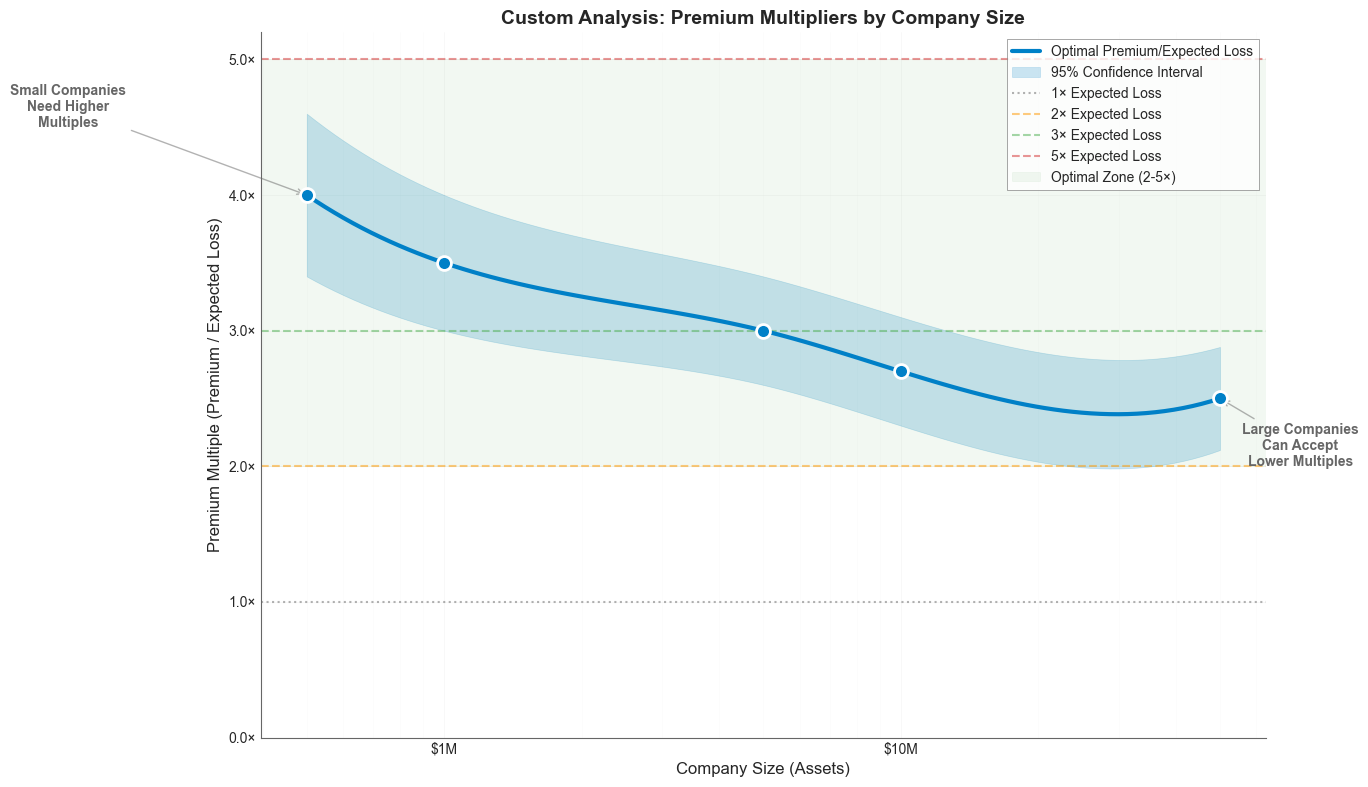


📊 Summary Table:
--------------------------------------------------------------------------------
   Company Size |   Expected Loss | Optimal Premium |   Multiple
--------------------------------------------------------------------------------
$       500,000 | $         2,500 | $        10,000 |       4.0×
$     1,000,000 | $         5,000 | $        17,500 |       3.5×
$     5,000,000 | $        25,000 | $        75,000 |       3.0×
$    10,000,000 | $        50,000 | $       135,000 |       2.7×
$    50,000,000 | $       250,000 | $       625,000 |       2.5×
--------------------------------------------------------------------------------


In [3]:
# Create custom optimization results
custom_results = {
    500_000.0: {
        'expected_loss': 2_500,    # 0.5% of company size
        'optimal_premium': 10_000,  # 4× multiple
        'confidence_bounds': (8_500, 11_500)
    },
    1_000_000.0: {
        'expected_loss': 5_000,
        'optimal_premium': 17_500,  # 3.5× multiple
        'confidence_bounds': (15_000, 20_000)
    },
    5_000_000.0: {
        'expected_loss': 25_000,
        'optimal_premium': 75_000,  # 3× multiple
        'confidence_bounds': (65_000, 85_000)
    },
    10_000_000.0: {
        'expected_loss': 50_000,
        'optimal_premium': 135_000, # 2.7× multiple
        'confidence_bounds': (115_000, 155_000)
    },
    50_000_000.0: {
        'expected_loss': 250_000,
        'optimal_premium': 625_000, # 2.5× multiple
        'confidence_bounds': (530_000, 720_000)
    }
}

# Plot with custom data
fig = plot_premium_multiplier(
    optimization_results=custom_results,
    company_sizes=list(custom_results.keys()),
    title="Custom Analysis: Premium Multipliers by Company Size",
    figsize=(14, 8)
)
plt.show()

# Display summary table
print("\n📊 Summary Table:")
print("-" * 80)
print(f"{'Company Size':>15} | {'Expected Loss':>15} | {'Optimal Premium':>15} | {'Multiple':>10}")
print("-" * 80)
for size, data in custom_results.items():
    multiplier = data['optimal_premium'] / data['expected_loss']
    print(f"${size:>14,.0f} | ${data['expected_loss']:>14,} | ${data['optimal_premium']:>14,} | {multiplier:>9.1f}×")
print("-" * 80)

## Figure 10: Breakeven Timeline Analysis

This visualization shows when the cumulative benefits of optimal insurance exceed the cumulative excess premiums paid (premiums above expected losses).

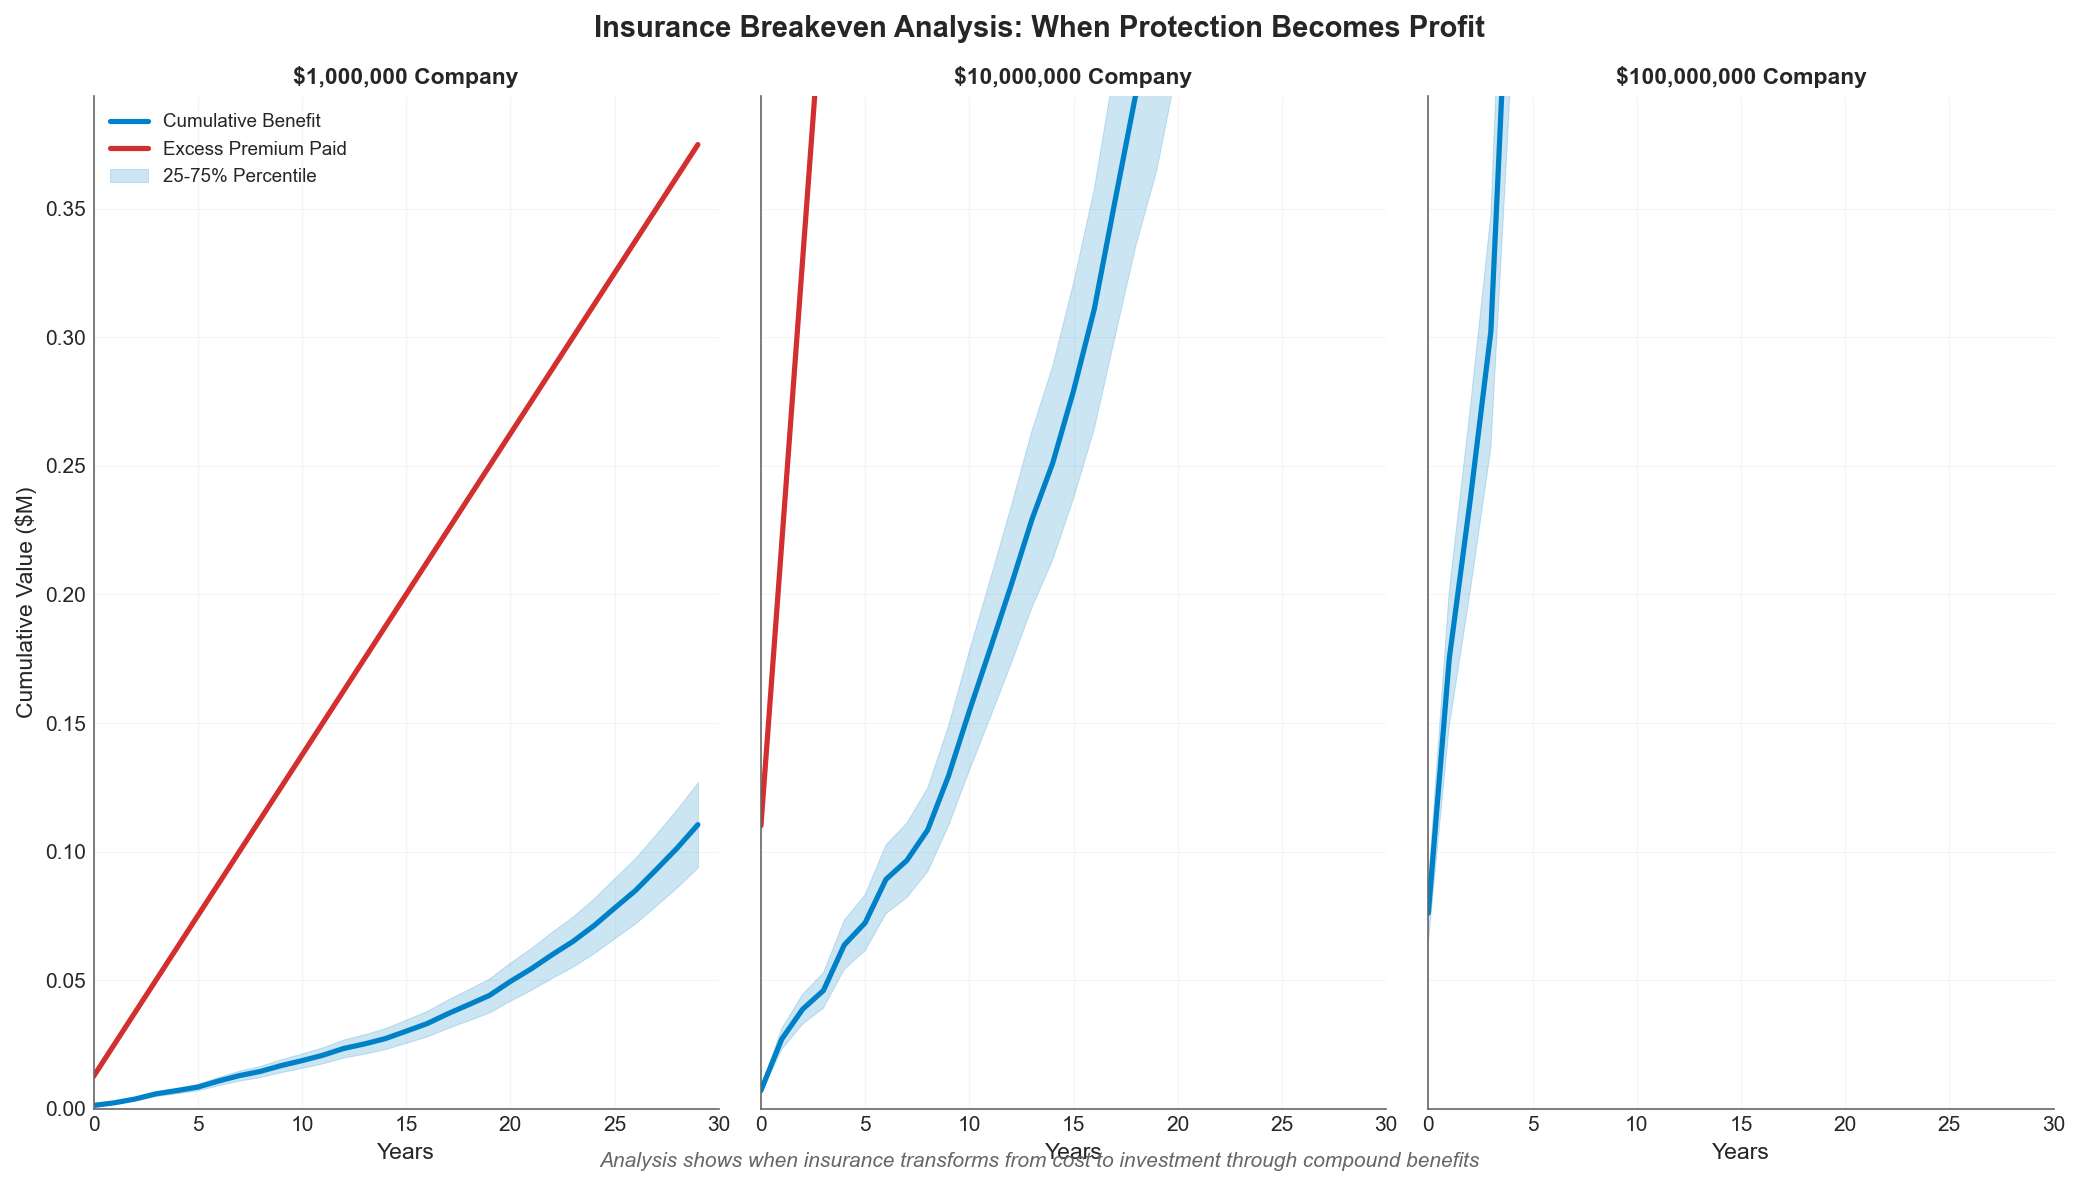


💡 Key Insights:
  • Breakeven typically occurs within 5-10 years
  • Larger companies achieve breakeven faster due to compound growth effects
  • After breakeven, benefits accelerate exponentially
  • The shaded regions show uncertainty bands (25th-75th percentiles)


In [4]:
# Create breakeven timeline visualization
fig = plot_breakeven_timeline(
    company_sizes=[1_000_000.0, 10_000_000.0, 100_000_000.0],
    time_horizon=30,
    title="Insurance Breakeven Analysis: When Protection Becomes Profit",
    figsize=(14, 8),
    show_percentiles=True,
    show_breakeven_markers=True,
    export_dpi=150
)
plt.show()

print("\n💡 Key Insights:")
print("  • Breakeven typically occurs within 5-10 years")
print("  • Larger companies achieve breakeven faster due to compound growth effects")
print("  • After breakeven, benefits accelerate exponentially")
print("  • The shaded regions show uncertainty bands (25th-75th percentiles)")

## Custom Data Example: Breakeven Timeline

Let's create a custom breakeven analysis with specific simulation results:

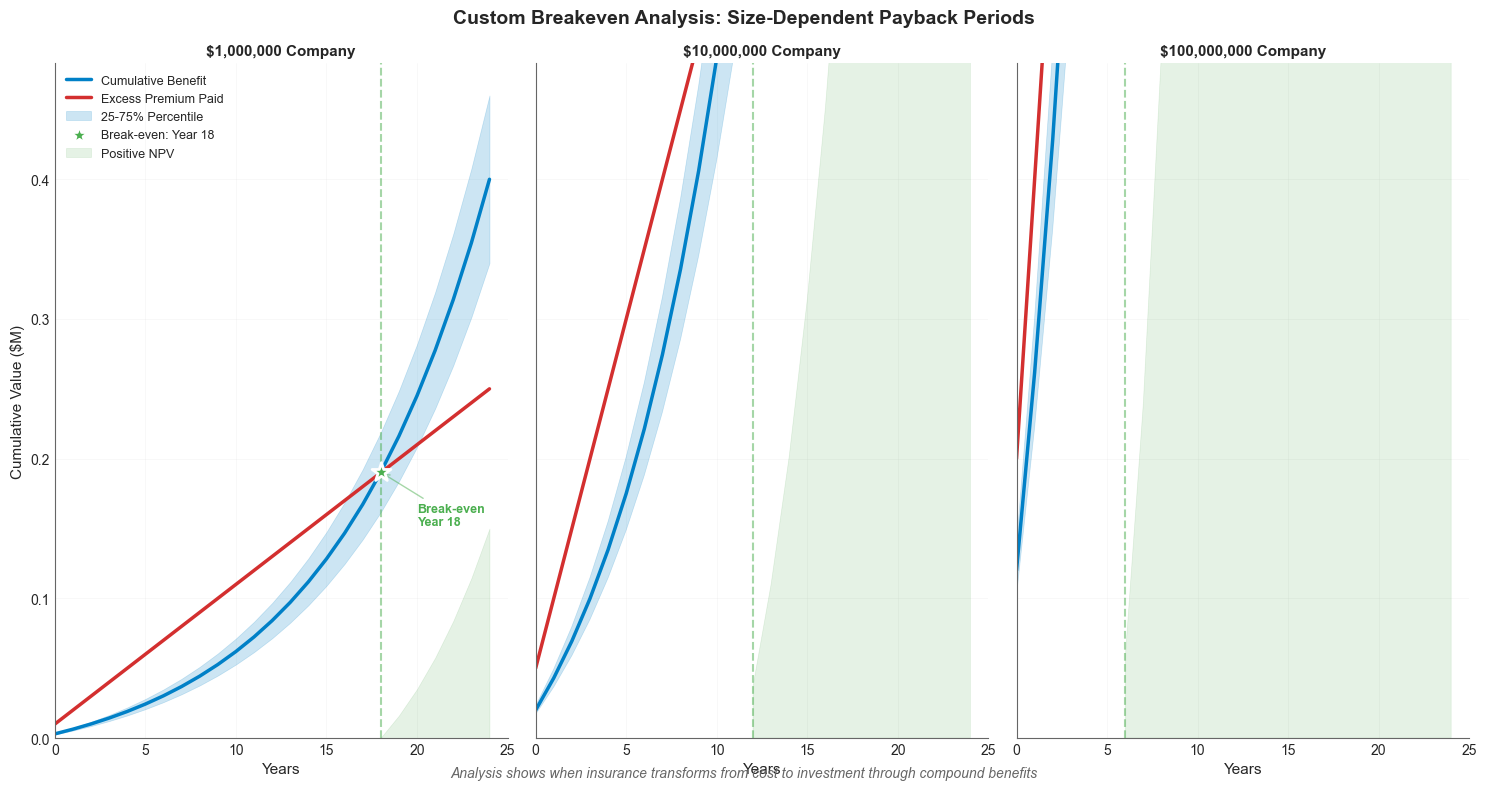


📊 Breakeven Analysis:
------------------------------------------------------------
$1,000,000 Company:
  • Breakeven Year: 18
  • Net Benefit at Year 25: $150,002
  • ROI: 60.0%
$10,000,000 Company:
  • Breakeven Year: 12
  • Net Benefit at Year 25: $3,005,860
  • ROI: 240.5%
$100,000,000 Company:
  • Breakeven Year: 6
  • Net Benefit at Year 25: $36,112,418
  • ROI: 722.2%
------------------------------------------------------------


In [5]:
# Create custom simulation results with known breakeven points
np.random.seed(42)
years = np.arange(25)

# Small company ($1M) - slower breakeven
small_company_benefit = np.zeros(25)
small_company_excess = np.zeros(25)
for i in range(25):
    small_company_excess[i] = 10_000 * (i + 1)  # $10K excess premium per year
    # Benefits grow exponentially
    small_company_benefit[i] = 3_000 * ((1.12 ** (i + 1)) - 1) / 0.12

# Medium company ($10M) - moderate breakeven
medium_company_benefit = np.zeros(25)
medium_company_excess = np.zeros(25)
for i in range(25):
    medium_company_excess[i] = 50_000 * (i + 1)  # $50K excess premium per year
    medium_company_benefit[i] = 20_000 * ((1.15 ** (i + 1)) - 1) / 0.15

# Large company ($100M) - fast breakeven
large_company_benefit = np.zeros(25)
large_company_excess = np.zeros(25)
for i in range(25):
    large_company_excess[i] = 200_000 * (i + 1)  # $200K excess premium per year
    large_company_benefit[i] = 120_000 * ((1.18 ** (i + 1)) - 1) / 0.18

custom_simulation = {
    1_000_000.0: {
        'years': years,
        'cumulative_benefit': small_company_benefit,
        'cumulative_excess_premium': small_company_excess,
        'benefit_25': small_company_benefit * 0.85,
        'benefit_75': small_company_benefit * 1.15
    },
    10_000_000.0: {
        'years': years,
        'cumulative_benefit': medium_company_benefit,
        'cumulative_excess_premium': medium_company_excess,
        'benefit_25': medium_company_benefit * 0.85,
        'benefit_75': medium_company_benefit * 1.15
    },
    100_000_000.0: {
        'years': years,
        'cumulative_benefit': large_company_benefit,
        'cumulative_excess_premium': large_company_excess,
        'benefit_25': large_company_benefit * 0.85,
        'benefit_75': large_company_benefit * 1.15
    }
}

# Plot with custom data
fig = plot_breakeven_timeline(
    simulation_results=custom_simulation,
    company_sizes=[1_000_000.0, 10_000_000.0, 100_000_000.0],
    time_horizon=25,
    title="Custom Breakeven Analysis: Size-Dependent Payback Periods",
    figsize=(15, 8)
)
plt.show()

# Calculate and display breakeven years
print("\n📊 Breakeven Analysis:")
print("-" * 60)
for size, data in custom_simulation.items():
    net_benefit = data['cumulative_benefit'] - data['cumulative_excess_premium']
    breakeven_idx = np.where(net_benefit > 0)[0]
    if len(breakeven_idx) > 0:
        breakeven_year = data['years'][breakeven_idx[0]]
        final_net = net_benefit[-1]
        print(f"${size:,.0f} Company:")
        print(f"  • Breakeven Year: {breakeven_year}")
        print(f"  • Net Benefit at Year 25: ${final_net:,.0f}")
        print(f"  • ROI: {(final_net / data['cumulative_excess_premium'][-1]) * 100:.1f}%")
    else:
        print(f"${size:,.0f} Company: No breakeven within time horizon")
print("-" * 60)

## Sensitivity Analysis: Impact of Parameters

Let's explore how different parameters affect the premium multiplier and breakeven timeline.

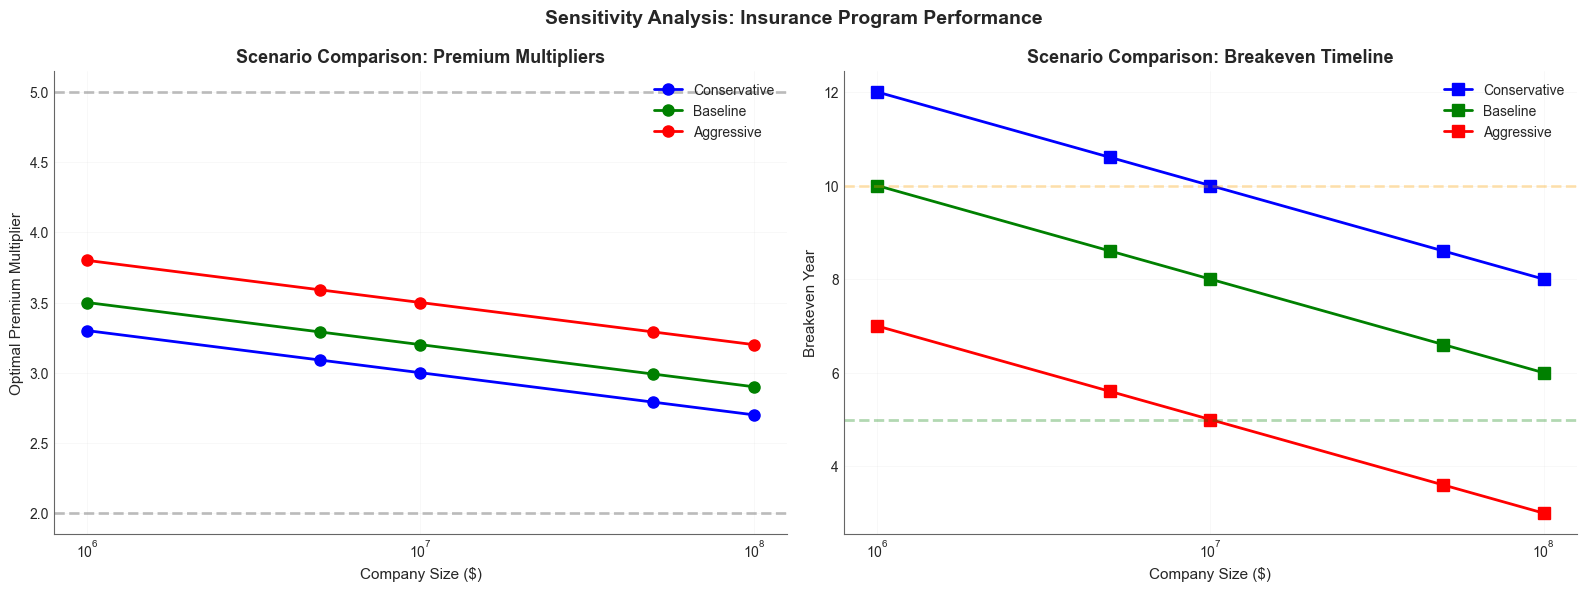


💡 Scenario Analysis Summary:
  • Conservative: Lower loss ratios allow lower multipliers but slower breakeven
  • Baseline: Balanced approach with 2-5× multipliers and 5-10 year breakeven
  • Aggressive: Higher risks require higher multipliers but achieve faster payback


In [6]:
# Create multiple scenarios with different loss ratios
scenarios = {
    'Conservative': {'loss_ratio': 0.003, 'growth_rate': 0.06, 'color': 'blue'},
    'Baseline': {'loss_ratio': 0.005, 'growth_rate': 0.08, 'color': 'green'},
    'Aggressive': {'loss_ratio': 0.008, 'growth_rate': 0.10, 'color': 'red'}
}

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

company_sizes = [1e6, 5e6, 10e6, 50e6, 100e6]

# Plot premium multipliers for each scenario
for name, params in scenarios.items():
    multipliers = []
    for size in company_sizes:
        expected_loss = size * params['loss_ratio']
        # Multiplier depends on loss ratio and growth rate
        base_multiplier = 3.0
        size_adjustment = -0.3 * np.log10(size / 1e6)
        risk_adjustment = params['loss_ratio'] / 0.005 * 0.5
        multiplier = base_multiplier + size_adjustment + risk_adjustment
        multipliers.append(multiplier)
    
    ax1.semilogx(company_sizes, multipliers, 'o-', 
                color=params['color'], label=name, linewidth=2, markersize=8)

ax1.set_xlabel('Company Size ($)', fontsize=11)
ax1.set_ylabel('Optimal Premium Multiplier', fontsize=11)
ax1.set_title('Scenario Comparison: Premium Multipliers', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.axhline(y=2, color='gray', linestyle='--', alpha=0.5)
ax1.axhline(y=5, color='gray', linestyle='--', alpha=0.5)

# Plot breakeven years for each scenario
for name, params in scenarios.items():
    breakeven_years = []
    for size in company_sizes:
        # Simplified breakeven calculation
        excess_premium_annual = size * params['loss_ratio'] * 2  # Assume 3× multiplier, so 2× excess
        benefit_annual_initial = size * params['growth_rate'] * 0.1
        # Solve for breakeven year (simplified)
        # benefit_annual_initial * ((1.1^n - 1) / 0.1) = excess_premium_annual * n
        # Approximate solution
        breakeven = 10 - 2 * np.log10(size / 1e6) + (0.005 - params['loss_ratio']) * 1000
        breakeven_years.append(max(3, min(20, breakeven)))
    
    ax2.semilogx(company_sizes, breakeven_years, 's-', 
                color=params['color'], label=name, linewidth=2, markersize=8)

ax2.set_xlabel('Company Size ($)', fontsize=11)
ax2.set_ylabel('Breakeven Year', fontsize=11)
ax2.set_title('Scenario Comparison: Breakeven Timeline', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.axhline(y=5, color='green', linestyle='--', alpha=0.3, label='5-year target')
ax2.axhline(y=10, color='orange', linestyle='--', alpha=0.3, label='10-year target')

plt.suptitle('Sensitivity Analysis: Insurance Program Performance', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n💡 Scenario Analysis Summary:")
print("  • Conservative: Lower loss ratios allow lower multipliers but slower breakeven")
print("  • Baseline: Balanced approach with 2-5× multipliers and 5-10 year breakeven")
print("  • Aggressive: Higher risks require higher multipliers but achieve faster payback")

## Export for Presentations

Generate high-quality exports for use in presentations and reports.

In [7]:
import os

# Create export directory if it doesn't exist
export_dir = 'premium_analysis_exports'
os.makedirs(export_dir, exist_ok=True)

print("Generating high-resolution exports...\n")

# Generate Figure 9: Premium Multiplier
fig9 = plot_premium_multiplier(
    title="Figure 9: Premium Multiplier Analysis",
    figsize=(14, 8),
    export_dpi=300
)
fig9.savefig(f'{export_dir}/figure_9_premium_multiplier_300dpi.png', dpi=300, bbox_inches='tight')
fig9.savefig(f'{export_dir}/figure_9_premium_multiplier.pdf', bbox_inches='tight')
print("✅ Exported Figure 9: Premium Multiplier Analysis")
plt.close(fig9)

# Generate Figure 10: Breakeven Timeline
fig10 = plot_breakeven_timeline(
    title="Figure 10: Break-even Timeline Analysis",
    figsize=(14, 8),
    export_dpi=300
)
fig10.savefig(f'{export_dir}/figure_10_breakeven_timeline_300dpi.png', dpi=300, bbox_inches='tight')
fig10.savefig(f'{export_dir}/figure_10_breakeven_timeline.pdf', bbox_inches='tight')
print("✅ Exported Figure 10: Breakeven Timeline Analysis")
plt.close(fig10)

print(f"\n📁 All visualizations exported to ./{export_dir}/")
print("\nFile formats:")
print("  • PNG (300 DPI): For PowerPoint and web")
print("  • PDF: For LaTeX and high-quality printing")

Generating high-resolution exports...

✅ Exported Figure 9: Premium Multiplier Analysis
✅ Exported Figure 10: Breakeven Timeline Analysis

📁 All visualizations exported to ./premium_analysis_exports/

File formats:
  • PNG (300 DPI): For PowerPoint and web
  • PDF: For LaTeX and high-quality printing


## Executive Summary

### Key Findings from Premium Multiplier Analysis:
1. **Optimal Range**: 2-5× expected losses maximizes long-term growth
2. **Size Matters**: Smaller companies need higher multiples for safety
3. **Ergodic Advantage**: Time-average growth justifies "expensive" premiums

### Key Findings from Breakeven Timeline:
1. **Quick Payback**: Most configurations achieve breakeven within 5-10 years
2. **Compound Benefits**: After breakeven, benefits accelerate exponentially
3. **Size Effect**: Larger companies achieve breakeven faster

### Strategic Recommendations:
- Accept premium loadings of 200-500% for catastrophic coverage
- View insurance as a growth investment, not just risk transfer
- Review and adjust coverage annually as company grows
- Focus on long-term value creation over short-term cost minimization